In [3]:
from sklearn.svm import SVC
from ml_pipeline import MLPipeline

# SVM with Wavelet Transform (subset_ratio=1/60)

In [4]:
# Initialiser le pipeline avec SVC
pipeline = MLPipeline(model=SVC(), wavelet='bior1.3')

# Charger les données avec subset_ratio=1/60
pipeline.load_data(
    train_path='./data/fashion-mnist_train.csv',
    test_path='./data/fashion-mnist_test.csv',
    subset_ratio=1/10
)

╭─────────── 📊 Loading Data ───────────╮
│ Loading datasets...                   │
│ Train: ./data/fashion-mnist_train.csv │
│ Test: ./data/fashion-mnist_test.csv   │
╰───────────────────────────────────────╯

⚠️  Applying subset ratio: 10.00%

         Dataset Summary         
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Metric               ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Train samples        │ 6000   │
│ Test samples         │ 1000   │
│ Features per sample  │ 784    │
│ Subset ratio applied │ 10.00% │
└──────────────────────┴────────┘

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ ✅ Data loaded successfully!                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

MLPipeline(model=SVC, wavelet='bior1.3', trained=False)

In [5]:
# GridSearchCV avec SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['poly', 'linear']
}

pipeline.fit_with_gridsearch(
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    use_wavelets=True,
    normalize=True,
    verbose=3
)

╭── 🔍 GridSearchCV Hyperparameter Tuning ───╮
│ Model: SVC                                 │
│ Cross-validation folds: 5                  │
│ Scoring metric: accuracy                   │
│ Parameter combinations: 10                 │
│ Total fits: 50 (10 combinations × 5 folds) │
│ Use wavelets: Yes                          │
│ Normalize: Yes                             │
╰────────────────────────────────────────────╯

                  Parameter Grid                  
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Parameter ┃ Values                  ┃ # Values ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ C         │ [0.1, 1, 10, 100, 1000] │    5     │
│ kernel    │ ['poly', 'linear']      │    2     │
└───────────┴─────────────────────────┴──────────┘

Preparing features...

/home/valentin/Documents/Ynov/Projet1_ML/.venv/lib/python3.13/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Starting GridSearchCV with 5-fold cross-validation...

⏳ Processing 50 fits... (verbose=3)

Tip: Watch the output below for sklearn's verbose progress

═══════════════════════════════════════════════════════════

             GridSearchCV Progress                         

═══════════════════════════════════════════════════════════

GridSearchCV:   2%|▏         | 1/50 [00:02<02:23,  2.92s/it][CV 1/5] END ..............C=0.1, kernel=linear;, score=0.853 total time=   1.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.848 total time=   1.8s
GridSearchCV:   4%|▍         | 2/50 [00:03<01:02,  1.31s/it][CV 2/5] END ..............C=0.1, kernel=linear;, score=0.841 total time=   1.9s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.850 total time=   2.5s
GridSearchCV:  14%|█▍        | 7/50 [00:06<00:26,  1.64it/s][CV 1/5] END ................C=0.1, kernel=poly;, score=0.705 total time=   5.4s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.680 total time=   5.3s
GridSearchCV:  24%|██▍       | 12/50 [00:09<00:30,  1.26it/s][CV 2/5] END ..................C=1, kernel=poly;, score=0.778 total time=   3.7s
[CV 2/5] END ................C=1, kernel=linear;, score=0.823 total time=   2.8s
GridSearchCV:  30%|███       | 15/50 [00:09<00:15,  2.26it/s][CV 3/5] END ................C=1, kernel=linear;, 

═══════════════════════════════════════════════════════════

✅ GridSearchCV completed in 21.84s

═══════════════════════════════════════════════════════════

╭── ✅ GridSearchCV Results ──╮
│ Best accuracy score: 0.8493 │
│                             │
│ Best Parameters:            │
│ C: 0.1                      │
│ kernel: linear              │
│                             │
│ Training time: 21.84s       │
╰─────────────────────────────╯

                          All CV Results                           
┏━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Rank ┃ Mean Score ┃ Std Score ┃ Parameters                      ┃
┡━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 1    │ 0.8493     │ 0.0051    │ {'C': 0.1, 'kernel': 'linear'}  │
│ 2    │ 0.8365     │ 0.0079    │ {'C': 100, 'kernel': 'poly'}    │
│ 3    │ 0.8305     │ 0.0071    │ {'C': 10, 'kernel': 'poly'}     │
│ 4    │ 0.8303     │ 0.0056    │ {'C': 1000, 'kernel': 'poly'}   │
│ 5    │ 0.8230     │ 0.0083    │ {'C': 1, 'kernel': 'linear'}    │
│ 6    │ 0.8117     │ 0.0076    │ {'C': 10, 'kernel': 'linear'}   │
│ 6    │ 0.8117     │ 0.0076    │ {'C': 1000, 'kernel': 'linear'} │
│ 6    │ 0.8117     │ 0.0076    │ {'C': 100, 'kernel': 'linear'}  │
│ 9    │ 0.7813     │ 0.0067    │ {'C': 1, 'kernel': 'poly'}      │
│ 10   │ 0.6877     │ 0.0092    │ {'C': 0.1, 'kernel': 'poly'}    │
└──────┴────────────┴───────────┴─────────────────────────────────┘

MLPipeline(model=SVC, wavelet='bior1.3', trained=True)

╭─ 🎲 Making Predictions ─╮
│ Samples: 1000           │
│ Use wavelets: Yes       │
│ Normalize: Yes          │
╰─────────────────────────╯

Preparing test features...

/home/valentin/Documents/Ynov/Projet1_ML/.venv/lib/python3.13/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Making predictions on 1000 samples...

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ ✅ Predictions completed: 1000 predictions made                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──── 📈 Model Evaluation ─────╮
│ ✅ Accuracy: 0.8400 (84.00%) │
╰──────────────────────────────╯

                  Classification Report                   
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃    Class     ┃ Precision ┃ Recall ┃ F1-Score ┃ Support ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│      0       │  0.7019   │ 0.8202 │  0.7565  │   89    │
│      1       │  0.9703   │ 0.9703 │  0.9703  │   101   │
│      2       │  0.7670   │ 0.6991 │  0.7315  │   113   │
│      3       │  0.8846   │ 0.8932 │  0.8889  │   103   │
│      4       │  0.7732   │ 0.7576 │  0.7653  │   99    │
│      5       │  0.9565   │ 0.9670 │  0.9617  │   91    │
│      6       │  0.5408   │ 0.5579 │  0.5492  │   95    │
│      7       │  0.9273   │ 0.9027 │  0.9148  │   113   │
│      8       │  0.9785   │ 0.8922 │  0.9333  │   102   │
│      9       │  0.9082   │ 0.9468 │  0.9271  │   94    │
├──────────────┼───────────┼────────┼──────────┼─────────┤
│  Macro Avg   │  0.8408   │ 0.8407 │  0.8399  │  1000   │
│ Weighted Avg │  0.8432   │ 0.8400 │  0.8407  │  1000   │
└──────────────┴───────────┴────────┴──────────┴─────────┘

Confusion Matrix:

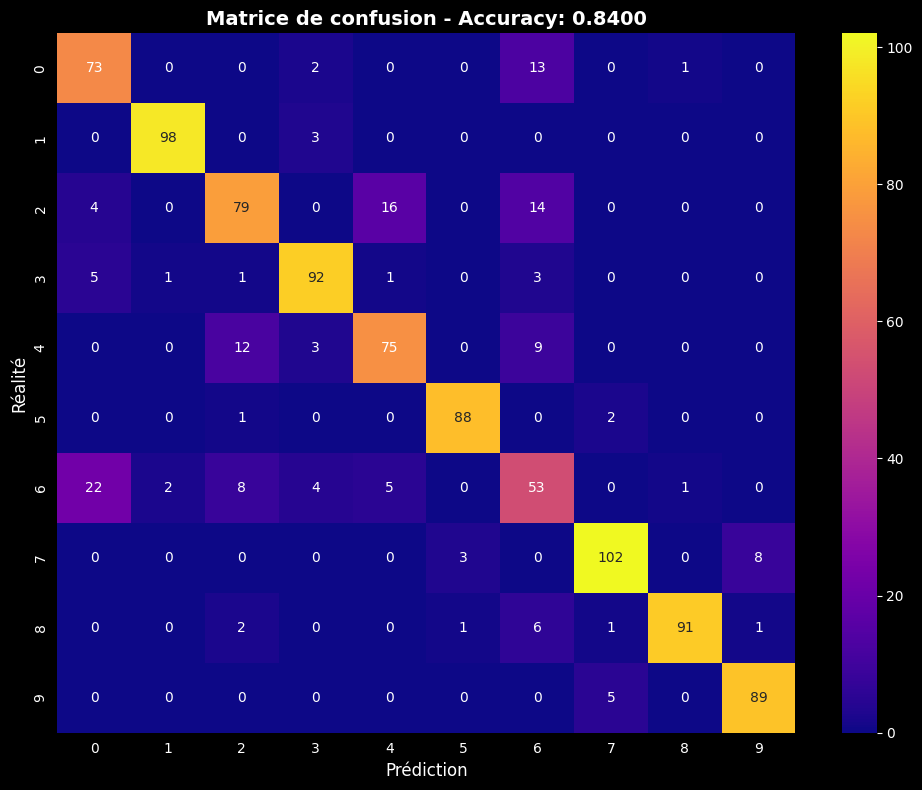

array([[ 73,   0,   0,   2,   0,   0,  13,   0,   1,   0],
       [  0,  98,   0,   3,   0,   0,   0,   0,   0,   0],
       [  4,   0,  79,   0,  16,   0,  14,   0,   0,   0],
       [  5,   1,   1,  92,   1,   0,   3,   0,   0,   0],
       [  0,   0,  12,   3,  75,   0,   9,   0,   0,   0],
       [  0,   0,   1,   0,   0,  88,   0,   2,   0,   0],
       [ 22,   2,   8,   4,   5,   0,  53,   0,   1,   0],
       [  0,   0,   0,   0,   0,   3,   0, 102,   0,   8],
       [  0,   0,   2,   0,   0,   1,   6,   1,  91,   1],
       [  0,   0,   0,   0,   0,   0,   0,   5,   0,  89]])

In [6]:
# Évaluation sur le jeu de test
pipeline.predict()
pipeline.evaluate()